# Model 1 - Z.K.

Import packages

In [1]:
import pandas as pd

Read data

In [2]:
df = pd.read_csv("data/cleaned_data.csv.gz", compression="gzip")

In [3]:
df

,year_production,mileage,engine_capacity,power,gearbox,price,Abarth,Acura,Aixam,Alfa Romeo,...,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow,New_cars,Used_cars
0,2018,48000,1368,145,0,82999,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2016,54500,1368,145,0,59900,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2023,5578,1368,165,1,135000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2019,116000,1368,165,0,79900,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2022,31190,1368,145,0,82000,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184247,2017,85000,1499,105,0,39900,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
184248,2015,122300,1998,165,0,68000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
184249,2019,97711,2488,194,1,119900,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
184250,2015,189300,2191,175,1,65500,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


Target variable - "price".

## 1. Prepare for modeling

#### 1.1 StandardScaler

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('price')
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['year_production', 'mileage', 'engine_capacity', 'power', 'gearbox']
Categorical columns: ['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', 'Aston Martin', 'Audi', 'Austin', 'BMW', 'BMW-ALPINA', 'BYD', 'Baic', 'Bentley', 'Brilliance', 'Buick', 'Cadillac', 'Casalini', 'Chatenet', 'Chevrolet', 'Chrysler', 'Citroën', 'Cupra', 'DFSK', 'DKW', 'DS Automobiles', 'Dacia', 'Daewoo', 'Daihatsu', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'GMC', 'Gaz', 'Honda', 'Hummer', 'Hyundai', 'Ineos', 'Infiniti', 'Inny', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Jetour', 'Kia', 'Lada', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus', 'Ligier', 'Lincoln', 'Lotus', 'MAN', 'MG', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'Microcar', 'Mitsubishi', 'Nissan', 'Nysa', 'Oldsmobile', 'Omoda', 'Opel', 'Peugeot', 'Plymouth', 'Polonez', 'Pontiac', 'Porsche', 'RAM', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Seat', 'Skoda', 'Skywell', 'Smart', 'SsangYong', 'Subaru', 'Suzuki',

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [6]:
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

df = pd.concat([df[numeric_cols + ['price']], df[categorical_cols]], axis=1)

In [7]:
df = df*1
df.head(5)

,year_production,mileage,engine_capacity,power,gearbox,price,Abarth,Acura,Aixam,Alfa Romeo,...,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow,New_cars,Used_cars
0,0.480689,-0.968906,-0.699431,-0.254407,-0.944106,82999,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.161685,-0.899704,-0.699431,-0.254407,-0.944106,59900,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.278200,-1.420546,-0.699431,-0.016959,1.059204,135000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.640191,-0.244952,-0.699431,-0.016959,-0.944106,79900,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.118698,-1.147871,-0.699431,-0.254407,-0.944106,82000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
df.describe()

,year_production,mileage,engine_capacity,power,gearbox,price,Abarth,Acura,Aixam,Alfa Romeo,...,Navy_blue,Orange,Other_color,Purple,Red,Silver,White,Yellow,New_cars,Used_cars
count,1.842520e+05,1.842520e+05,1.842520e+05,1.842520e+05,1.842520e+05,1.842520e+05,184252.000000,184252.000000,184252.000000,184252.000000,...,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000,184252.000000
mean,-1.299731e-15,1.987353e-16,-3.906991e-14,-3.410864e-15,-1.593782e-13,8.243270e+04,0.000331,0.000087,0.000353,0.008803,...,0.033069,0.005829,0.045210,0.003387,0.048016,0.109730,0.168335,0.004005,0.085584,0.914416
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.004107e+05,0.018192,0.009318,0.018779,0.093412,...,0.178817,0.076125,0.207765,0.058097,0.213800,0.312554,0.374164,0.063161,0.279749,0.279749
min,-1.594802e+01,-1.479921e+00,-1.939297e+00,-1.916545e+00,-9.441056e-01,5.550000e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.358250e-01,-8.101068e-01,-5.329200e-01,-6.105798e-01,-9.441056e-01,2.700000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.616853e-01,4.572750e-03,-2.314017e-02,-1.950454e-01,-9.441056e-01,5.300000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.401915e-01,6.812832e-01,1.062261e-01,2.798512e-01,1.059204e+00,9.999900e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.437702e+00,6.960102e+00,8.307533e+00,1.583271e+01,1.059204e+00,3.700000e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.2 Train test split

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Lasso regressor

#### 2.1 Estimate lasso

In [9]:
from sklearn.linear_model import LassoCV

# Set up the LassoCV regressor
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Print the best alpha found
print("Best alpha using built-in LassoCV: ", lasso_cv.alpha_)

Best alpha using built-in LassoCV:  65.02589543828756


Best alpha using built-in LassoCV:  65.02589543828756

#### 2.2 Evaluate the model

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training and test data
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train MSE: 2782834729.7345786
Test MSE: 2926085206.831737
Train R²: 0.7243004177761863
Test R²: 0.7089960470467618


We give up lasso for this script in aim of training xgb. Built-in lasso performance is not sufficient.

## 3. XGBoost

#### 3.1 Total sample

#### 3.1.1 Estimate the model

In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV

In [12]:
XGBR = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [20]:
param_grid = {
    'n_estimators': [700, 800, 900, 1000, 1100, 1200],  # Number of trees
    'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2],  # Learning rate
    'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85],  # Fraction of samples used for tree building
    'colsample_bytree': [0.7, 0.75, 0.8, 0.85, 0.9],  # Fraction of features used for tree building
    'min_child_weight': [2, 3, 4],  # Minimum sum of instance weight needed in a child
}

In [21]:
random_search = RandomizedSearchCV(
    estimator = XGBR,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [22]:
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END colsample_bytree=0.85, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=700, subsample=0.7; total time=  53.9s
[CV] END colsample_bytree=0.85, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=700, subsample=0.7; total time=  54.9s
[CV] END colsample_bytree=0.85, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=700, subsample=0.7; total time=  54.9s
[CV] END colsample_bytree=0.85, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=700, subsample=0.7; total time=  56.1s
[CV] END colsample_bytree=0.85, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=700, subsample=0.7; total time=  56.6s
[CV] END colsample_bytree=0.8, learning_rate=0.08, max_depth=12, min_child_weight=2, n_estimators=1100, subsample=0.75; total time=  58.5s
[CV] END colsample_bytree=0.8, learning_rate=0.08, max_depth=12, min_child_weight=2, n_estimators=1100, subsample=0.75; total time=  58.9s
[CV] END colsample_bytree=0.8, learni

In [23]:
best_params

{'subsample': 0.65,
 'n_estimators': 900,
 'min_child_weight': 2,
 'max_depth': 13,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

#### 3.1.2 Evaluate the model

In [27]:
best_xgb = xgb.XGBRegressor(**best_params, random_state=123)

In [65]:
scores_mae = cross_val_score(best_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
scores_mse = cross_val_score(best_xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
scores_mae = abs(scores_mae)
scores_mae = scores_mae.mean()
scores_std = scores_mae.std()
scores_mse = abs(scores_mse)
scores_mse = scores_mse.mean()
print(f'Mean MAE: {scores_mae} ({scores_std}) Mean MSE: {scores_mse}')

Mean MAE: 11254.77302469131 (0.0) Mean MSE: 779091871.6550146


In [30]:
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [31]:
y_pred = best_xgb.predict(X_test)

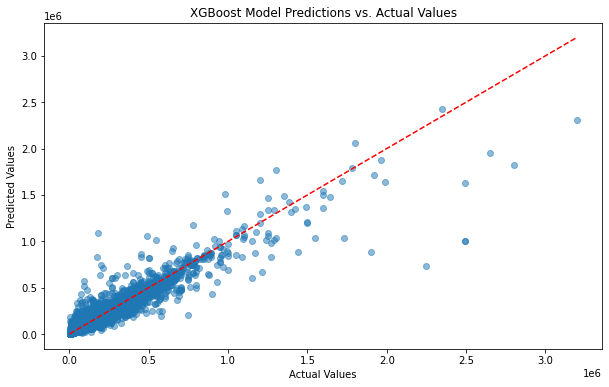

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Model Predictions vs. Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.show()

#### 3.2 Split using median

#### 3.2.0 Prepare the data

In [35]:
df_low = df[df['price'] <= 53000]
df_high = df[df['price'] > 53000]

In [38]:
# Split df_high and df_low into features (X) and target (y)
X_high, y_high = df_high.drop(columns=['price']), df_high['price']
X_low, y_low = df_low.drop(columns=['price']), df_low['price']

# Train-test split for df_high
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Train-test split for df_low
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

#### 3.2.1 Estimate the model

#### 3.2.1.1 High

In [ ]:
# XGBR = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [700, 800, 900, 1000, 1100, 1200],
#     'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#     'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2],
#     'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85],
#     'colsample_bytree': [0.7, 0.75, 0.8, 0.85, 0.9],
#     'min_child_weight': [2, 3, 4]
# }

In [39]:
# RandomizedSearchCV for df_high
random_search_high = RandomizedSearchCV(XGBR, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search_high.fit(X_high_train, y_high_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/zuzanna/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.1,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learnin...
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.75, 0.8,
                                                             0.85, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.08, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'min_child_weight': [2, 3, 4],
                                        'n_estimators': [700, 800, 900, 1000,
                                                         1100, 1200],
                                        'subsample': [0.6, 0.65, 0.7, 0.75, 0.8,
                                                      0.85]},
                   random_state=42, verbose=1)

In [40]:
# Get the best parameters for df_high
best_params_high = random_search_high.best_params_
best_params_high

{'subsample': 0.75,
 'n_estimators': 700,
 'min_child_weight': 4,
 'max_depth': 15,
 'learning_rate': 0.01,
 'colsample_bytree': 0.9}

In [41]:
# Train the best model for df_high
best_xgb_high = xgb.XGBRegressor(**best_params_high, objective='reg:squarederror')
best_xgb_high.fit(X_high_train, y_high_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# Predict and evaluate for df_high
y_high_pred = best_xgb_high.predict(X_high_test)

In [50]:
scores_mae = cross_val_score(best_xgb_high, X_high_train, y_high_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
scores_mse = cross_val_score(best_xgb_high, X_high_train, y_high_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
scores_mae = abs(scores_mae)
scores_mae_high = scores_mae.mean()
scores_std_high = scores_mae.std()
scores_mse = abs(scores_mse)
scores_mse_high = scores_mse.mean()
print(f'Mean MAE: {scores_mae_high} ({scores_std_high}) Mean MSE: {scores_mse_high}')

Mean MAE: 15927.495373375452 (94.77010481716525) Mean MSE: 1408900073.082095


#### 3.2.1.2 Low

In [43]:
# RandomizedSearchCV for low
random_search_low = RandomizedSearchCV(XGBR, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search_low.fit(X_low_train, y_low_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.1,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learnin...
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.75, 0.8,
                                                             0.85, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.08, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'min_child_weight': [2, 3, 4],
                                        'n_estimators': [700, 800, 900, 1000,
                                                         1100, 1200],
                                        'subsample': [0.6, 0.65, 0.7, 0.75, 0.8,
                                                      0.85]},
                   random_state=42, verbose=1)

In [45]:
# Get the best parameters for df_low
best_params_low = random_search_low.best_params_
best_params_low

{'subsample': 0.85,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 11,
 'learning_rate': 0.05,
 'colsample_bytree': 0.7}

In [46]:
# Train the best model for df_high
best_xgb_low = xgb.XGBRegressor(**best_params_low, objective='reg:squarederror')
best_xgb_low.fit(X_low_train, y_low_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
scores_mae = cross_val_score(best_xgb_low, X_low_train, y_low_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
scores_mse = cross_val_score(best_xgb_low, X_low_train, y_low_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
scores_mae = abs(scores_mae)
scores_mae_low = scores_mae.mean()
scores_std_low= scores_mae.std()
scores_mse = abs(scores_mse)
scores_mse_low = scores_mse.mean()
print(f'Mean MAE: {scores_mae_low} ({scores_std_low}) Mean MSE: {scores_mse_low}')

Mean MAE: 3654.3696118850944 (11.960029876812547) Mean MSE: 29621948.10847801


## 4. Compare the models

Merge low + high

In [54]:
import numpy as np

In [57]:
best_xgb_low = xgb.XGBRegressor(**best_params_low, random_state=123)
best_xgb_low.fit(X_low_train, y_low_train)
low_pred_y = best_xgb_low.predict(X_low_test)

best_xgb_high = xgb.XGBRegressor(**best_params_high, random_state=123)
best_xgb_high.fit(X_high_train, y_high_train)
high_pred_y = best_xgb_high.predict(X_high_test)

low_true_pred = pd.DataFrame({'True': y_low_test, 'Predicted': low_pred_y})
high_true_pred = pd.DataFrame({'True': y_high_test, 'Predicted': high_pred_y})

low_high_true_pred = pd.concat([low_true_pred, high_true_pred])

true_values = low_high_true_pred['True']
estimated_values = low_high_true_pred['Predicted']
scores_mae_low_high = np.mean(np.abs(true_values - estimated_values))
scores_mse_low_high = np.mean((true_values - estimated_values) ** 2)
scores_std_low_high = np.std(np.abs(true_values - estimated_values))

Compare the performance

In [62]:
performance = pd.DataFrame({
    'all': [scores_mae, scores_mse],
    'splitted': [scores_mae_low_high, scores_mse_low_high]
})
performance.index = ['mae', 'mse']
pd.options.display.float_format = '{:.6f}'.format
performance

,all,splitted
mae,11254.773025,9169.194378
mse,779091871.655015,515309944.823920
sd. error,0.000000,20766.218223


## 5. Conclusion 

Comparision table shows that we benefit for splitting the data for cars below the medium price and above. Further extensions of the model may include other splitting points, which would improve the precision of predicitons even more.